<a href="https://colab.research.google.com/github/KumarAshutosh2003/Code-Soft/blob/main/Codsoft_TitanicSurvivorProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries And Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Collection of Data & Processing

In [3]:
# Loading the Data from CSV filed to Pandas Dataframe
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

In [4]:
#Printing some rows of the dataset to know the columns available in it
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Countng number of rows and column in the datset and getting some info about dataset
titanic_data.shape
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Misiing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Treatment of Null Values

In [7]:
# Dropping the cabin column from the dataset
titanic_data = titanic_data.drop(columns='Cabin',axis=1)

#Already deleted the column once

In [8]:
# Replacing missing values in "Age" column with mean values
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [9]:
#replcing the missing values of "Embarked" column with mode value of that column
print(titanic_data['Embarked'].mode()[0])
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

S


Data Analysis

In [10]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# No. of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

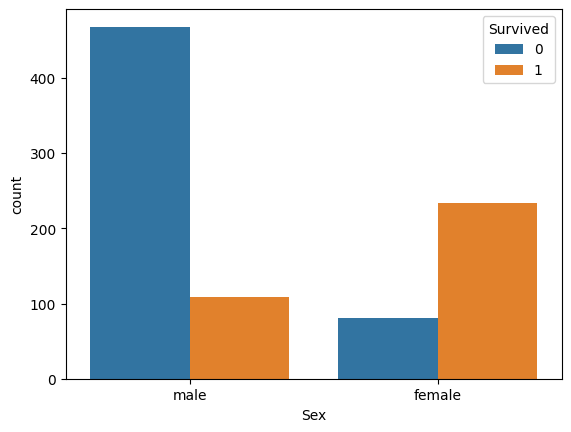

In [13]:
#number of survivors genderwise
sns.countplot(x='Sex',hue='Survived',data = titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

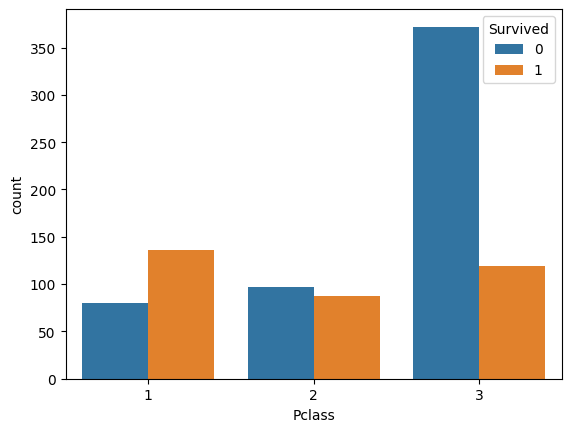

In [14]:
# Survivors according to classwise
sns.countplot(x='Pclass',hue='Survived',data = titanic_data)

In [15]:
# Converting categorical column into numerical values
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

Seprating Features and Target

In [21]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

print(X)
print("     \n")
print("This is Column Y\n",Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
     

This is Column Y
 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting Dataset into Training and Test Data

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 3)

In [35]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(891, 7) (712, 7) (179, 7)
(891,) (712,) (179,)


Training the model with logistic regression

In [36]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluation of the model

In [37]:
# Accuracy Scvore
# Accuracy on Training Data
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 

In [41]:
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print("Accuracy Score for training data is:",training_data_accuracy)

Accuracy Score for training data is: 0.8089887640449438


In [39]:
# Accuracy on Test Data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1
 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1]


In [42]:
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print("Accuracy Score for test data is:",test_data_accuracy)

Accuracy Score for test data is: 0.770949720670391
